<a href="https://colab.research.google.com/github/saisampaththumati-datascientists/NLP-natural_learning_language-/blob/main/PyTorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn# neural network contain the building block
import matplotlib.pyplot as plt

### Data Preparing and loading
Data can be almost anything
* excel spead sheet
* images of any king
* videos
* Audio
* DNA
* Text
Machine learning is a game of two parts:
1 Get the data into numerical represntation
2 build a model to learn the patterns in that numerical representation.

In [2]:
# creating the **known** parameter
weight =0.7
bias=0.3
# create
start = 0
end =1
step=0.02
X=torch.arange(start=start,end=end,step=step).unsqueeze(dim=1)
y=weight*X+bias
y[:10],y.shape,X[:10]

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]))

In [3]:
train_split=int(.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

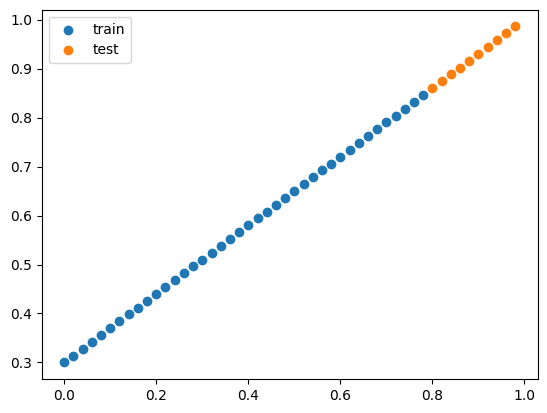

In [4]:
plt.scatter(x=X_train,y=y_train,label="train")
plt.scatter(x=X_test,y=y_test,label="test")
plt.legend()

## what the model is going to do ?
* start with the random values (weight and bias)
* Look at Training and adjust the random values to better represent (or get closer to ) the ideal values
How does it do so
1. Gradient Decent
2. Back Propagation

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias  # this is the linear regression formula
# we are creating the linear regression model



## Pytorch model building essential
- torch.nn - contain all of the buildings for computational graph (a nn can be consider consider a computational graph)
- nn.Parameter what paramerter should our model try and learn, often a pytorch layer from torch.nn will set these for us
- torch.nn.module - the base class for a;;; n modelues , if we subclass it you should over write forword
- torch.optim this where the optimizers

In [6]:
torch.manual_seed(42)
model=LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
torch.manual_seed(43)
torch.randn(1)

tensor([-0.6484])

In [8]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
weight,bias

(0.7, 0.3)

### Making the predicting using `torch.inference_mode()`
- To check model predictive powe

In [10]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [11]:
with torch.inference_mode():
  y_prect= model(X_test)

y_prect

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

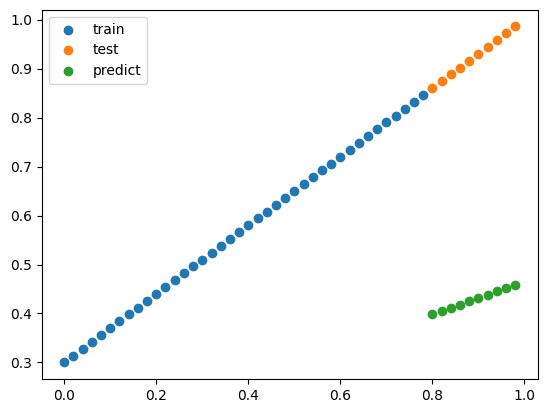

In [12]:
plt.scatter(x=X_train,y=y_train,label="train")
plt.scatter(x=X_test,y=y_test,label="test")
plt.scatter(x=X_test,y=y_prect,label="predict")
plt.legend()

## Traning the model
- Lossfunction
***Note:*** Criterion in different area
* **Loss Function** A function that lower your loss. as low as better the model
* **Optimizer** takes into account the loss of the model and adjust the model parameters

In [13]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
## l1loss is mae in pytorch
loss_fn= nn.L1Loss()
#setup optimer
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
epochs=1
for epoch in range (epochs):
  #set the model to training mode
  model.train()
  #forword pass
  y_pred= model(X_train)
  #calucalte the loss
  loss=loss_fn(y_pred,y_train)
  print(loss)
  #optimizer changes
  optimizer.zero_grad()
  #backward
  loss.backward()
  #steps for optimizer
  optimizer.step()
  model.eval()
  print(model.state_dict())

tensor(0.3129, grad_fn=<MeanBackward0>)
OrderedDict([('weight', tensor([0.3467])), ('bias', tensor([0.1388]))])


# train the model
calculate the loss
optimizer
perform backpropagation
optimizer

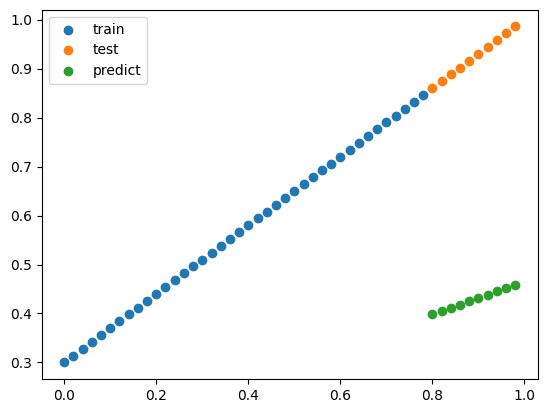

In [16]:
plt.scatter(x=X_train,y=y_train,label="train")
plt.scatter(x=X_test,y=y_test,label="test")
plt.scatter(x=X_test,y=y_prect,label="predict")
plt.legend()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

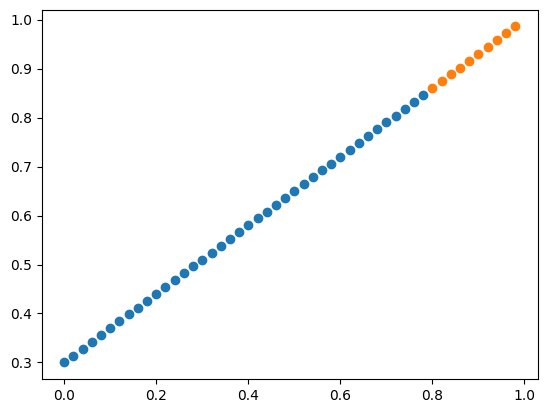

In [17]:
plt.scatter(x=X_train,y=y_train,label="train")
plt.scatter(x=X_test,y=y_test,label="test")
plt.scatter(x=X_train,y=y_pred,label="predict")
plt.legend()

In [18]:
# start the model from scrach
# def a class
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [51]:
model_1=LinearRegressionModel()
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [52]:
model

LinearRegressionModel()

In [53]:
epochs=100
# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)
torch.manual_seed(42)
for epoch in range (epochs):
  #set the model to train
  model_1.train()
  # model to predict for the forword
  y_predict_1=model_1(X_train)
  # loss for the predict
  loss= loss_fn(y_predict_1,y_train)
  #optimizer
  optimizer.zero_grad()
  #loss backward
  loss.backward()
  #steps for the optimizer
  optimizer.step()
  # final evaluate
  model.eval()
  with torch.inference_mode():
    test_pre=model_1(X_test)
    test_loss=loss_fn(test_pre,y_test)
  if epochs %10==0:
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    epoch_count.append(epoch)
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 1 | Train loss: 0.3013603389263153 | Test loss: 0.4675942063331604
Epoch: 2 | Train loss: 0.28983935713768005 | Test loss: 0.4541231691837311
Epoch: 3 | Train loss: 0.2783183455467224 | Test loss: 0.44065219163894653
Epoch: 4 | Train loss: 0.26679736375808716 | Test loss: 0.4271811842918396
Epoch: 5 | Train loss: 0.2552763521671295 | Test loss: 0.41371020674705505
Epoch: 6 | Train loss: 0.24375534057617188 | Test loss: 0.40023916959762573
Epoch: 7 | Train loss: 0.23223432898521423 | Test loss: 0.3867681920528412
Epoch: 8 | Train loss: 0.22071333229541779 | Test loss: 0.37329721450805664
Epoch: 9 | Train loss: 0.20919232070446014 | Test loss: 0.3598262071609497
Epoch: 10 | Train loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 11 | Train loss: 0.18615034222602844 | Test loss: 0.3328842222690582
Epoch: 12 | Train loss: 0.1746293306350708 | Test loss: 0.3194132149219513
Epoch: 13 | Train loss

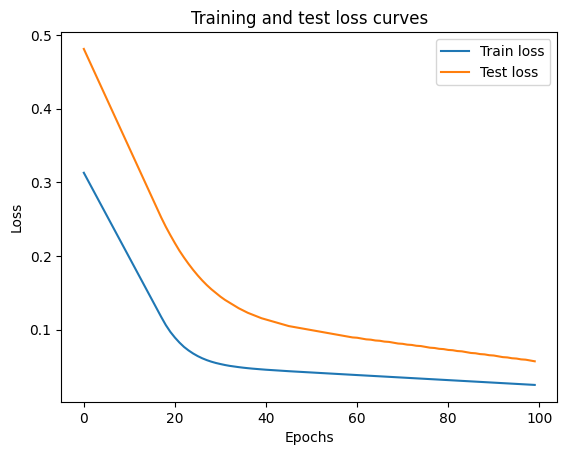

In [54]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

 ## Making predictions with a trained PyTorch model (inference)
 There are three things to remember when making predictions (also called performing inference) with a PyTorch model:

- Set the model in evaluation mode (model.eval()).
- Make the predictions using the inference mode context manager (with torch.inference_mode(): ...).
- All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

In [55]:
model_1.eval()
y_predict= model_1(X_test)
y_predict

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]], grad_fn=<AddBackward0>)

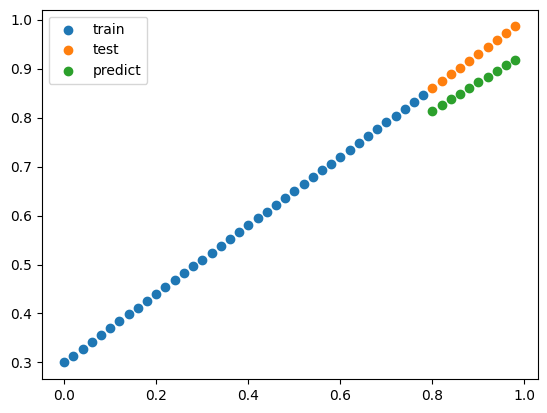

In [56]:
plt.scatter(x=X_train,y=y_train,label="train")
plt.scatter(x=X_test,y=y_test,label="test")
plt.scatter(x=X_test,y=y_predict.detach().numpy(),label="predict")
plt.legend()

In [57]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias  # this is the linear regression formula
# we are creating the linear regression model

